## Dataset import, esploration and manipulation

In [48]:
import pandas as pd
import numpy as np
import sklearn

In [49]:
classification_dataset = 'classification_dataset.csv'
original_df = pd.read_csv(classification_dataset, sep = ';')

attrezzature = set()
lingue_parlate = []


Rimuoviamo dal dataset le colonne che non sono utili alla classificazione: ID','PROVINCIA','COMUNE','LOCALITA', 'LATITUDINE', 'LONGITUDINE'

In [50]:
df = original_df.copy()
drop_labels = ['ID','PROVINCIA','COMUNE','LOCALITA', 'LATITUDINE', 'LONGITUDINE']

df.drop(drop_labels, axis=1, inplace=True)
df.head()

,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,OUTPUT
0,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,B&B
1,4,0,8,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,B&B
2,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,NaN,NaN,NaN,NaN,Case_Appartamenti
3,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...","American express,Visa,Master Card,Diners,Maest...","Inglese,Francese,Spagnolo,Tedesco,Rumeno,Serbo...",NaN,"Numero sale congressi 3,Congressi capacita' Mi...",4_a_5_Stelle
4,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Case_Appartamenti


Di seguito definisco alcune funzioni:
- split_col: uso questa funzione per indagare sugli attributi di 'ATTREZZATURE_VARIE'
- count_languages: per vedere contare le lingue parlate nelle strutture
- clean_text: alcune operazioni per pulire il testo nel dataframe

In [51]:
import re
def split_col(x):
    try:
        cell = x.split(',')
        for i in cell:
            attrezzature.add(i)
    except Exception:
        pass
    return(x)

def count_languages(x):
    l = 0
    try:
        cell = x.split(',')
        l = len(set(cell)) # set to avoid counting duplicates
    except Exception:
        pass
    return(l)

def clean_text(x):
    try:
        # rimuove caratteri speciali
        x = re.sub(r'\W', ' ', x)

        # sostituisco il doppio spazio con il singolo
        x = re.sub(r'\s+', ' ', x, flags=re.I)

        # convertiamo tutto a lower case
        x = x.lower()
    except Exception:
        pass
    return(x)



Quindi applichiamo le funzioni al dataframe

In [52]:
df['ATTREZZATURE_VARIE'].apply(lambda x: clean_text(x))

0                                                     NaN
1                                                     NaN
2                          accettazione animali domestici
3       ascensore ristorante bar accettazione animali ...
4                                                     NaN
                              ...                        
6770                   access diversamente abili parziale
6771                                                  NaN
6772                                                  NaN
6773    access diversamente abili totale accettazione ...
6774                                                  NaN
Name: ATTREZZATURE_VARIE, Length: 6775, dtype: object

In [53]:
df['ATTREZZATURE_VARIE'].apply(lambda x: split_col(x))

0                                                     NaN
1                                                     NaN
2                          Accettazione animali domestici
3       Ascensore,Ristorante,Bar,Accettazione animali ...
4                                                     NaN
                              ...                        
6770                  Access. diversamente abili parziale
6771                                                  NaN
6772                                                  NaN
6773    Access. diversamente abili totale,Accettazione...
6774                                                  NaN
Name: ATTREZZATURE_VARIE, Length: 6775, dtype: object

In [54]:
print(len(attrezzature))

111


In [55]:
df['TOT_LINGUE_PARLATE']= df['LINGUE_PARLATE'].apply(lambda x: count_languages(x))

In [56]:
df.drop(columns=['LINGUE_PARLATE'], inplace=True)

In [57]:
df.tail()

,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,SPORT,CONGRESSI,OUTPUT,TOT_LINGUE_PARLATE
6770,46,0,50,46,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Access. diversamente abili parziale,NaN,NaN,NaN,Case_Appartamenti,1
6771,19,0,25,13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case_Appartamenti,0
6772,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Case_Appartamenti,0
6773,2,0,6,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Access. diversamente abili totale,Accettazione...",NaN,NaN,NaN,Case_Appartamenti,0
6774,4,0,20,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Case_Appartamenti,0


Facciamo una piccola analisi sui missing values per le varie features del dataset:

In [58]:
df.isna().sum()

CAMERE                    0
SUITE                     0
LETTI                     0
BAGNI                     0
PRIMA_COLAZIONE           0
IN_ABITATO              107
SUL_LAGO                107
VICINO_ELIPORTO         107
VICINO_AEREOPORTO       107
ZONA_CENTRALE           107
VICINO_IMP_RISALITA     107
ZONA_PERIFERICA         107
ZONA_STAZIONE_FS        107
ATTREZZATURE_VARIE     2759
CARTE_ACCETTATE        4705
SPORT                  6168
CONGRESSI              6468
OUTPUT                    0
TOT_LINGUE_PARLATE        0
dtype: int64

SPORT e CONGRESSI e CARTE ACCETTATE hanno molti missing values. Vale la pensa investigare un po' per capire se possono essere completamente trascurati nel modello

In [59]:
congressi_nan = {k: df['CONGRESSI'][df['OUTPUT'] == k].isna().sum()/(df['CONGRESSI'][df['OUTPUT'] == k].isna().sum()+df['CONGRESSI'][df['OUTPUT'] == k].notna().sum()) for k in set(df['OUTPUT'])}
sport_nan = {k: df['SPORT'][df['OUTPUT'] == k].isna().sum()/(df['SPORT'][df['OUTPUT'] == k].isna().sum()+df['SPORT'][df['OUTPUT'] == k].notna().sum()) for k in set(df['OUTPUT'])}
carte_nan = {k: df['CARTE_ACCETTATE'][df['OUTPUT'] == k].isna().sum()/(df['CARTE_ACCETTATE'][df['OUTPUT'] == k].isna().sum()+df['CARTE_ACCETTATE'][df['OUTPUT'] == k].notna().sum()) for k in set(df['OUTPUT'])}


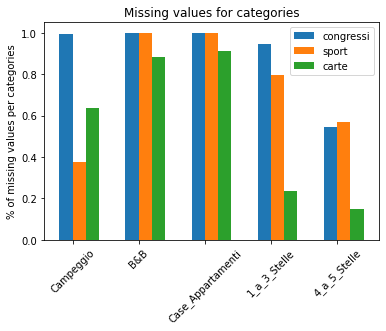

In [60]:
import matplotlib.pyplot as plt

width = 0.2
x = np.arange(len(congressi_nan))
              
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, congressi_nan.values(), width, label='congressi')
rects2 = ax.bar(x + width/2, sport_nan.values(), width, label='sport')
rects3 = ax.bar(x + 1.5*width, carte_nan.values(), width, label='carte')

              
ax.set_xticks(x)
ax.set_xticklabels(list(congressi_nan.keys()), rotation=45)
ax.set_title('Missing values for categories') 
plt.ylabel('% of missing values per categories')
plt.legend()
plt.show()


- Le info sui CONGRESSI sono mancanti per circa il 100% per Campeggio, B&B, Case e appartamenti. Questa info è presenze solo per gli hotel. 
- Info sullo sport sono date perlopiù da strutture di Campeggio e hotel
- Info sulle carte sono date perlopiù dagli hotel. 

Siccome abbiamo troppi missing data per queste colonne (CARTE_ACCETTATE: 4705, SPORT: 6168, CONGRESSI:6468), queste verranno trascurate.

In [61]:
df.drop(columns=['CONGRESSI', 'SPORT', 'CARTE_ACCETTATE'], inplace=True)

In [62]:
df

,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,OUTPUT,TOT_LINGUE_PARLATE
0,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,B&B,0
1,4,0,8,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,B&B,0
2,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,Case_Appartamenti,0
3,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...",4_a_5_Stelle,7
4,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Case_Appartamenti,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,46,0,50,46,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Access. diversamente abili parziale,Case_Appartamenti,1
6771,19,0,25,13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case_Appartamenti,0
6772,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Case_Appartamenti,0
6773,2,0,6,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Access. diversamente abili totale,Accettazione...",Case_Appartamenti,0


## Modeling

Prima, convertiamo le classi categoriche in numeriche

In [63]:
outputs = list(set(df['OUTPUT']))
outputs_mapped = range(5)
conversion = {k: v for k,v in zip(outputs, range(len(outputs)))}
conversion

{'Campeggio': 0,
 'B&B': 1,
 'Case_Appartamenti': 2,
 '1_a_3_Stelle': 3,
 '4_a_5_Stelle': 4}

In [64]:
df['NEW_OUTPUT'] = df['OUTPUT'].map(conversion)
df.head()

,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,OUTPUT,TOT_LINGUE_PARLATE,NEW_OUTPUT
0,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,B&B,0,1
1,4,0,8,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,B&B,0,1
2,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,Case_Appartamenti,0,2
3,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...",4_a_5_Stelle,7,4
4,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Case_Appartamenti,0,2


Il modello di classificazione che applico è il Decision Trees.
Quindi la prima cosa da fare è eliminare 'attrezzature varie e eliminare i nanvalue dalle varie rows. Queste dovrebbero essere 107 (dalla cella superiore).

In [65]:
df1 = df.drop(columns='ATTREZZATURE_VARIE')
df1.head()

,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,OUTPUT,TOT_LINGUE_PARLATE,NEW_OUTPUT
0,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B&B,0,1
1,4,0,8,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B&B,0,1
2,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Case_Appartamenti,0,2
3,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4_a_5_Stelle,7,4
4,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Case_Appartamenti,0,2


In [66]:
before = len(df1)
print('items before dropping nanvalue: ', before)
df1.dropna(inplace=True)
print('items after dropping nanvalue: ', len(df1))
df1.head()
print('total dropped: ', before - len(df1))

items before dropping nanvalue:  6775
items after dropping nanvalue:  6668
total dropped:  107


Controlliamo se il dataset è bilanciato:

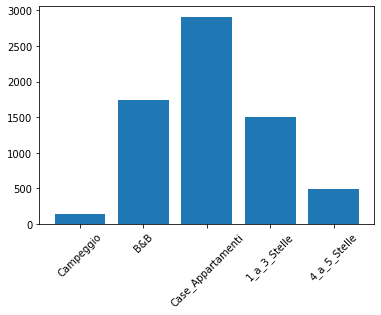

In [67]:
check_balance_data = {k:len(np.where(df['OUTPUT']==k)[0]) for k in set(df['OUTPUT'])}

plt.bar(check_balance_data.keys(), check_balance_data.values() )
plt.xticks(rotation=45)
plt.show()

Il nostro dataset è sbilanciato. Le classi "Campeggio" e "4_a_5_Stelle" sono sottorappresentate. Bisogna tenere presente quindi che il classificatore potrebbe fare fatica a classificare correttamente una struttura appartenente a queste due categorie.

In [68]:
df1.drop('OUTPUT', axis=1,inplace=True)

In [69]:
from sklearn.model_selection import train_test_split
from  sklearn.metrics import mean_squared_error, accuracy_score

In [70]:
X,y = df1.drop('NEW_OUTPUT', axis=1), df1['NEW_OUTPUT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Facciamo un check sulla rappresentazione delle categorie nel training set 

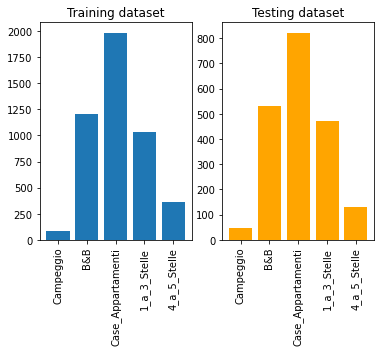

In [71]:
outputs_mapped = range(5)
check_train = {k:len(np.where(y_train==k)[0]) for k in outputs_mapped}

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.bar(check_train.keys(), check_train.values())
ax1.set_xticks(ticks=list(check_train.keys()))
ax1.set_xticklabels(labels=list(conversion.keys()), rotation=90)
ax1.set_title('Training dataset')

# test
check_test = {k:len(np.where(y_test==k)[0]) for k in outputs_mapped}

ax2.bar(check_test.keys(), check_test.values(), color='orange')
ax2.set_xticks(ticks=list(check_test.keys()))
ax2.set_xticklabels(labels=list(conversion.keys()), rotation=90)
ax2.set_title('Testing dataset')

plt.show()


Le classi si trovano in equa misura sia nel training che nel test set. Questo è garantito dalla libreria train test split di sklearn.

### Fase 2

In questa fase, estendo il dataset per le attrezzature. Prima investighiamo sui suoi attributi:

In [72]:
df2 = df.copy()

# convertiamo le variabili d'output da categoriche a numeriche
df2['NEW_OUTPUT'] = df2['OUTPUT'].map(conversion)
df2.head()

before = len(df2)
print('items before dropping nanvalue: ', before)
df2.dropna(inplace=True)
df2.reset_index(inplace=True)
print('items after dropping nanvalue: ', len(df2))
print('total dropped: ', before - len(df2))
df2.head()


items before dropping nanvalue:  6775
items after dropping nanvalue:  3978
total dropped:  2797


,index,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,OUTPUT,TOT_LINGUE_PARLATE,NEW_OUTPUT
0,2,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,Case_Appartamenti,0,2
1,3,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...",4_a_5_Stelle,7,4
2,5,3,0,10,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Accesso a mezzi pubblici,Accesso a vetture pri...",B&B,3,1
3,6,1,0,2,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"Biciclette per ospiti,Parco o giardino,Sala te...",B&B,0,1
4,9,2,0,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Accesso a mezzi pubblici,Parco o giardino,Post...",B&B,2,1


In [73]:
attrezzature

{'Access. diversamente abili parziale',
 'Access. diversamente abili totale',
 'Accesso a mezzi pubblici',
 'Accesso a vetture private',
 'Accettazione animali domestici',
 'Accettazione gruppi',
 'Animazione professionale',
 'Area attrezzata gioco bimbi',
 'Area fumatori',
 'Area riservata per intrattenimenti e spettacoli',
 'Aria condizionata',
 'Aria condizionata centralizzata',
 'Aria condizionata non centralizzata',
 'Ascensore',
 'Attivit� didattiche varie',
 'Attivit� ricreative varie',
 'Attrezzatura di pronto soccorso',
 'Attrezzatura per preparazione comune dei pasti',
 'Attrezzature di conforto per soggiorno animali domestici',
 'Attrezzature o servizi aggiuntivi di maggior conforto per il soggiorno o ristoro',
 'Autorimessa',
 'Bagno turco',
 'Bar',
 'Barbecue',
 'Biciclette per ospiti',
 'Bigliardo',
 'Camper service',
 'Centro benessere',
 'Cucina di uso comune',
 'Custodia valori in cassaforte',
 'Custodia valori in cassette sicurezza',
 'Deposito sci riscaldato',
 'Disc

Come si può vedere, non ci sono duplicati. Siamo pronti quindi a far diventare questi attributi delle nuove colonne del dataset

In [74]:
df2 = pd.concat([df2,pd.DataFrame(columns=list(attrezzature))])
df2.drop(columns=['index'], inplace=True)
df2.head()

,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,...,Lampada esterna,Self service o Tavola calda,Autorimessa,Aria condizionata,Barbecue,Spiaggia privata,Lavapiedi,Pulizia calzature,Locale di ritrovo,Attrezzatura per preparazione comune dei pasti
0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93.0,2.0,194.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df2.fillna(value=0, inplace=True)

Ora dobbiamo riempire le nuove colonne con 1 se una struttura ha quel particolare servizio (attrezzatura) e 0 se non ce l'ha

In [76]:
def fill_services(row):
    try:
        cell = row['ATTREZZATURE_VARIE'].split(',')
        for service in cell:
            df_prova.at[row.name, service] = 1
    except Exception as e:
        pass
#     return(df_prova)

In [77]:
df_prova = df2.copy()

In [78]:
df_prova.apply(lambda x: fill_services(x), axis=1)
type(df_prova)

pandas.core.frame.DataFrame

In [79]:
df_prova.head()

,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,...,Lampada esterna,Self service o Tavola calda,Autorimessa,Aria condizionata,Barbecue,Spiaggia privata,Lavapiedi,Pulizia calzature,Locale di ritrovo,Attrezzatura per preparazione comune dei pasti
0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,93.0,2.0,194.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,3.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Prediction with trees

L'approccio che userò è questo: uso il 70% dei dati per training e il 30% per testing. Inoltre, per controllare che non ci sia overfitting, utilizzo la tecnica del cross validation. 

In [80]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_validate

In [81]:
df_prova.columns

Index(['CAMERE', 'SUITE', 'LETTI', 'BAGNI', 'PRIMA_COLAZIONE', 'IN_ABITATO',
       'SUL_LAGO', 'VICINO_ELIPORTO', 'VICINO_AEREOPORTO', 'ZONA_CENTRALE',
       ...
       'Lampada esterna', 'Self service o Tavola calda', 'Autorimessa',
       'Aria condizionata', 'Barbecue', 'Spiaggia privata', 'Lavapiedi',
       'Pulizia calzature', 'Locale di ritrovo',
       'Attrezzatura per preparazione comune dei pasti'],
      dtype='object', length=128)

In [82]:
df_modeling = df_prova.drop(columns=['NEW_OUTPUT', 'OUTPUT', 'ATTREZZATURE_VARIE'], axis=1)
X,y= df_prova.drop(columns=['NEW_OUTPUT', 'OUTPUT', 'ATTREZZATURE_VARIE'], axis=1), df_prova['NEW_OUTPUT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [83]:
# define the model
tree_classifier = tree.DecisionTreeClassifier(splitter='random', criterion='entropy', min_samples_split=10, )

In [84]:
cv_results = cross_validate(tree_classifier, X_train, y_train, cv=3, scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)
cv_results

{'fit_time': array([0.01600289, 0.01598644, 0.01498985]),
 'score_time': array([0.0039978 , 0.00300336, 0.00299931]),
 'test_r2': array([0.81594824, 0.85643963, 0.78534296]),
 'train_r2': array([0.93154972, 0.93017152, 0.9420237 ]),
 'test_neg_mean_squared_error': array([-0.21551724, -0.16810345, -0.25215517]),
 'train_neg_mean_squared_error': array([-0.08028017, -0.08189655, -0.06788793])}

Come si può vedere, le tree fold del cross validation riportano risultati molto simili tra loro. Questo indica che non c'è overfitting. Passiamo al training vero e proprio e ai risultati sulla classificazione. 

In [85]:
tree_classifier = tree_classifier.fit(X_train, y_train)

In [86]:
fimp = tree_classifier.feature_importances_
d = {k:v for k,v in zip(df_modeling.columns, fimp)}
d

{'CAMERE': 0.026303804402927528,
 'SUITE': 0.002708075130453705,
 'LETTI': 0.03722164547540913,
 'BAGNI': 0.09268538338868136,
 'PRIMA_COLAZIONE': 0.004336406268489766,
 'IN_ABITATO': 0.002276743461276219,
 'SUL_LAGO': 0.002430224666336614,
 'VICINO_ELIPORTO': 0.0,
 'VICINO_AEREOPORTO': 0.0,
 'ZONA_CENTRALE': 0.02528189361099254,
 'VICINO_IMP_RISALITA': 0.0,
 'ZONA_PERIFERICA': 0.001086405390764959,
 'ZONA_STAZIONE_FS': 0.00033023871297999026,
 'TOT_LINGUE_PARLATE': 0.01510858850865145,
 'Somministrazione bevande': 0.0038521485811814863,
 'Piazzole prevalentemente a prato': 0.0,
 'Servizio di pulizia e cambio biancheria assicurato almeno 3 volte alla settimana': 0.0,
 'Attrezzatura di pronto soccorso': 0.0,
 'Attivit� didattiche varie': 0.0,
 'Centro benessere': 0.0,
 'Televisore a noleggio': 0.0,
 'Camper service': 0.0,
 'Trasporto clienti stazione': 0.002838442594447351,
 'Somministrazione alcolici': 0.0,
 'Lavaggio auto e roulottes ad uso degli ospiti': 0.0,
 'WI-FI in aree comuni':

Proviamo il modello con nuovi dati (test set)

mse:  0.15326633165829145
fraction of correctly classified samples:  0.8768844221105527


<AxesSubplot:>

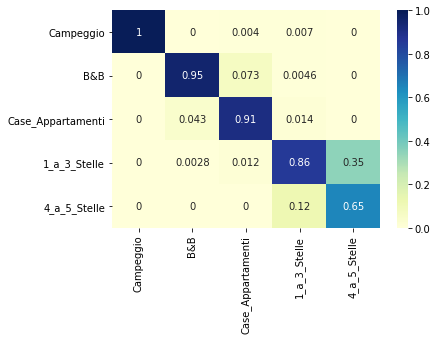

In [87]:
y_predicted_test_tree = tree_classifier.predict(X_test)
mse_test_tree = mean_squared_error(y_predicted_test_tree, y_test)
print('mse: ', mse_test_tree)
acc_test_tree = accuracy_score(y_predicted_test_tree, y_test) # return the fraction of correctly classified samples
print('fraction of correctly classified samples: ', acc_test_tree)

cfm_test_tree = confusion_matrix(y_test, y_predicted_test_tree, normalize='pred')
sns.heatmap(cfm_test_tree, xticklabels=outputs, yticklabels=outputs, annot=True, cmap="YlGnBu") 

L'overall accuracy è 87%. é un dato molto buono, che indica tra l'altro che non c'è stato overfitting.

In [88]:
# !pip install graphviz

Possiamo visualizzare l'albero decisionale runnando la cella di sotto

NameError: name 'export_graphviz' is not defined

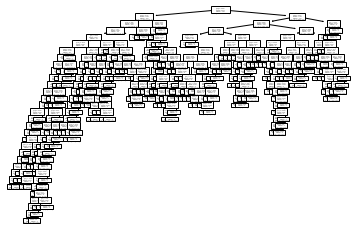

In [89]:
tree.plot_tree(tree_classifier) 
from IPython.display import display
import graphviz
display(graphviz.Source(export_graphviz(tree_classifier)))

## Prediction with Random Forest

Gli alberi decisionali sono proni all'overfitting. Per controllare il rischio di overfitting, ho utilizzato il cross validate. Tuttavia, possiamo fare un'ulteriore check, utilizzando RandomForestClassifier. Grazie al grado di random che si ha con questo modello, solitamente la probabilità di overfitting è ridotta. 

In questo caso, non utilizzerò il cross validate, ma train/test/validation split. In questo modo posso fare hyperparameter tuning utilizzando validation dataset e testare su test dataset. (trset=60%, test set= valset = 20%)

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
X3,y3= df_prova.drop(columns=['NEW_OUTPUT', 'OUTPUT', 'ATTREZZATURE_VARIE'], axis=1), df_prova['NEW_OUTPUT']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=42)

X_val = X_train3[int(0.2*len(X_train3))+1:].copy()
y_val = y_train3[int(0.2*len(y_train3))+1:].copy()

X_train3 = X_train3[:int(0.2*len(X_train3))].copy()
y_train3 = y_train3[:int(0.2*len(y_train3))].copy()

mse:  0.12220039292730844
fraction of correctly classified samples:  0.8994106090373281


Text(0.5, 1.0, 'Validation results')

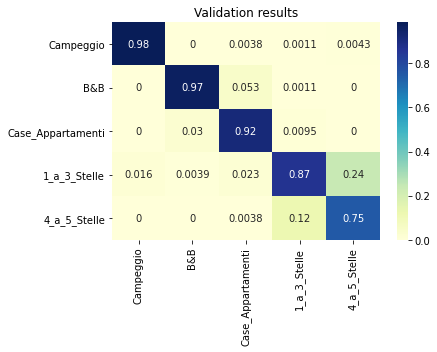

In [92]:
clf = RandomForestClassifier( random_state=0)
clf.fit(X_train3, y_train3)
y_rf_predict = clf.predict(X_val)

mse_rf = mean_squared_error(y_rf_predict, y_val)
print('mse: ', mse_rf)
acc_rf = accuracy_score(y_rf_predict, y_val) # return the fraction of correctly classified samples
print('fraction of correctly classified samples: ', acc_rf)

cfm_rf = confusion_matrix(y_val, y_rf_predict, normalize='pred')
sns.heatmap(cfm_rf, xticklabels=outputs, yticklabels=outputs, annot=True, cmap="YlGnBu").set_title('Validation results')

mse:  0.11180904522613065
fraction of correctly classified samples:  0.8994974874371859


Text(0.5, 1.0, 'Test results')

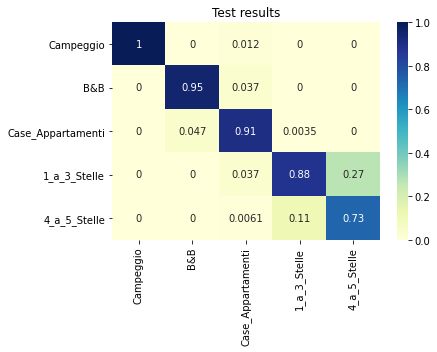

In [93]:
y_rf_predict_test = clf.predict(X_test3)

mse_rf_test = mean_squared_error(y_rf_predict_test, y_test3)
print('mse: ', mse_rf_test)
acc_rf_test = accuracy_score(y_rf_predict_test, y_test3) # return the fraction of correctly classified samples
print('fraction of correctly classified samples: ', acc_rf_test)

cfm_rf_test = confusion_matrix(y_test3, y_rf_predict_test, normalize='pred')
sns.heatmap(cfm_rf_test, xticklabels=outputs, yticklabels=outputs, annot=True, cmap="YlGnBu").set_title('Test results')

I risultati indicano che non c'è overfitting

In [94]:
fimp = clf.feature_importances_
d11 = {k:v for k,v in zip(df_modeling.columns, fimp)}
d

{'CAMERE': 0.026303804402927528,
 'SUITE': 0.002708075130453705,
 'LETTI': 0.03722164547540913,
 'BAGNI': 0.09268538338868136,
 'PRIMA_COLAZIONE': 0.004336406268489766,
 'IN_ABITATO': 0.002276743461276219,
 'SUL_LAGO': 0.002430224666336614,
 'VICINO_ELIPORTO': 0.0,
 'VICINO_AEREOPORTO': 0.0,
 'ZONA_CENTRALE': 0.02528189361099254,
 'VICINO_IMP_RISALITA': 0.0,
 'ZONA_PERIFERICA': 0.001086405390764959,
 'ZONA_STAZIONE_FS': 0.00033023871297999026,
 'TOT_LINGUE_PARLATE': 0.01510858850865145,
 'Somministrazione bevande': 0.0038521485811814863,
 'Piazzole prevalentemente a prato': 0.0,
 'Servizio di pulizia e cambio biancheria assicurato almeno 3 volte alla settimana': 0.0,
 'Attrezzatura di pronto soccorso': 0.0,
 'Attivit� didattiche varie': 0.0,
 'Centro benessere': 0.0,
 'Televisore a noleggio': 0.0,
 'Camper service': 0.0,
 'Trasporto clienti stazione': 0.002838442594447351,
 'Somministrazione alcolici': 0.0,
 'Lavaggio auto e roulottes ad uso degli ospiti': 0.0,
 'WI-FI in aree comuni':

# Conclusioni

Il dataset iniziale è stato modificato, in particolare, le 'ATTREZZATURE_VARIE' sono state estratte e trasformate in nuove colonne del dataset. I valori associati a queste colonne sono valori booleani, che indicano con 1 la presenza dell'attrezzatura nella relativa struttura, e 0 la sua assenza. $\newline$ 
Inoltre per le colonne congressi, sport e carte accettate erano, c'erano troppi missing values (CARTE_ACCETTATE:4705, SPORT: 6168, CONGRESSI: 6468), quindi queste colonne sono state completamente trascurate. $\newline$ 

Infine, i modelli utilizzati per la classificazione sono stati 2 due: decision tree e random forest. Entrambi hanno dato risultati molto buoni, con un'accuratezze superiore al 80%. Inoltre, per entrambi non sembrano esserci segni di overfitting. 